<a href="https://colab.research.google.com/github/Shubhamd13/NLP/blob/main/2_2_Word2Vec_Training_Student_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

## Plotting Utility

In [3]:
import matplotlib.pyplot as plt

# Plot Embedding
def plot_embedding(matrix, vocab):
    plt.figure(figsize=(7, 4))

    for voc in vocab:
        indx = word_to_index[voc]
        x = matrix[indx, 0]
        y = matrix[indx, 1]
        plt.scatter(x, y)
        plt.annotate(voc, xy=(x, y))

    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title("Embedding Visualization")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

# Define our vocabulary - Positive Pair (UCR, UCI), Negative Pair (UCR, UCD)

In [4]:
# Define our vocabulary
southern_schools = ["UCLA", "UCSD", "UCI", "UCR", "UCSB"]
northern_schools = ["UCB", "UCSC", "UCD", "UCSF", "UCM"]
vocab = southern_schools + northern_schools

word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = {i: word for i, word in enumerate(vocab)}

vocab_size = len(vocab)

embedding_dim = 2
learning_rate = 5

# Q1: What is the index of the word "UCR" in the vocabulary?

In [5]:
## Write code here
word_to_index['UCR']

3

# Q2: What is the one-hot vector of the word "UCR"?

In [7]:
## Write code here
one_hot = [0] * vocab_size
one_hot[word_to_index['UCR']] = 1

print(f"One-hot vector for UCR: {one_hot}")

One-hot vector for UCR: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


# Q3: Initialize weight matrix and context matrix randomly

[1.57921282 0.76743473]


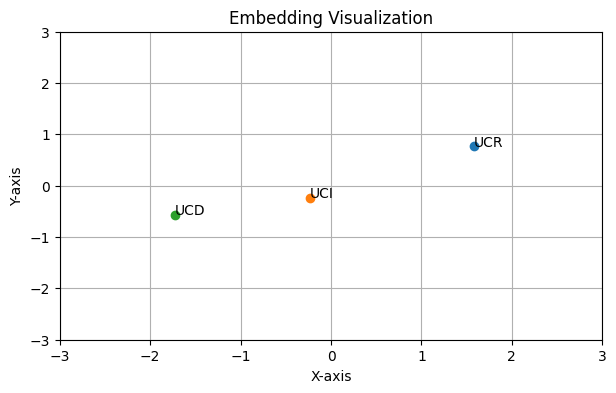

In [8]:
np.random.seed(42)
random.seed(42)

A =  vocab_size ## this is the vocabulary size
B =  embedding_dim ## this is the embedding dimension


W = np.random.randn(A, B)
C = np.random.randn(A, B)
print(W[word_to_index['UCR']])


plot_embedding(W, ["UCR", "UCI", "UCD"])

# Q4. Define Activation Function

Sigmoid Function: $\sigma(z) = \frac{1}{ 1 + exp(-z)}$

In [9]:
#! define sigmoid function
def sigmoid(z):
  z = np.clip(z, -100, 100)
  return 1 / (1 + np.exp(-z))

# cosine similarity
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [10]:
# Q4. If two schools have a dot product of 2.5, what would be the sigmoid of this value?

## Write code here
sigmoid(2.5)

np.float64(0.9241418199787566)

In [11]:
# Find the cosine similarity of (UCR, UCI).

## Write code here
cosine_similarity(W[word_to_index["UCR"]], W[word_to_index["UCI"]])

np.float64(-0.9450626212774035)

# Q5-Q6 Forward

$L_{CE}=-\bigg[log\sigma(c_{pos}\cdot w) + \sum_{i=1}^{k}log\sigma(-c_{neg_i}\cdot w)\bigg]$

In [12]:
# Q5. What is the loss of the positive pair (UCR, UCI) before optimization?

context_word = "UCI"
target_word = "UCR"

# convert to index.
context_word_index = word_to_index[context_word]
target_word_index = word_to_index[target_word]

# obtain context vector
h_context = C[context_word_index]

# compute positive prediction and loss.
u_target = np.dot(h_context,W[target_word_index]) ## Write code here for the dot product
pos_loss = -np.log(sigmoid(u_target))

print(pos_loss)

1.1536242268638053


In [13]:
# Q6. What is the loss of the negative pair (UCR, UCD) before optimization?

# Obtain negative samples.
neg_samples_index = word_to_index["UCD"]

# obtain context vector for negative
h_neg = C[neg_samples_index]

#! compute negative prediction and loss.
u_neg_samples = np.dot(h_neg,W[target_word_index]) ## Write code here for the dot product
neg_loss = -np.sum(np.log(sigmoid(-u_neg_samples)))

print(neg_loss)

0.890471821792204


# Q7-Q9 Backward

1. $c^{t+1}_{pos} = c^t_{pos} - \eta [\sigma(c^t_{pos}\cdot w^t)-1]w^t$

2. $c^{t+1}_{neg} = c^t_{neg} - \eta [\sigma(c^t_{neg}\cdot w^t)]w^t$

3. $w^{t+1} = w^t - \eta \bigg[ [\sigma (c_{pos} \cdot w^t - 1)]c_{pos} + \sum_{i=1}^{k}[\sigma (c_{neg_i}\cdot w^t)] c_{neg_i}\bigg]$

In [ ]:
# Q7. What is the value of the positive gradient?

grad_pos = ## Write code here (hints: sigmoid(positive context word vector dot target word vector); dot product calculated in Q5)
print(grad_pos)
W[target_word_index]  -= learning_rate * grad_pos * C[context_word_index]
C[context_word_index] -= learning_rate * grad_pos * W[target_word_index]

In [ ]:
# Q8. What is the value of the negative gradient?

grad_neg = ## Write code here (hints: sigmoid(negative context word vector dot target word vector); dot product calculated in Q6)
print(grad_neg)
W[target_word_index] -= learning_rate * grad_neg * C[neg_samples_index]
C[neg_samples_index] -= learning_rate * grad_neg * W[target_word_index]

In [ ]:
# Q9. What is the new weight of the word "UCR" after optimization?

## Write code here

plot_embedding(W, ["UCR", "UCI", "UCD"])

# Q10. Cosine between the positive pair

In [ ]:
# Q10. What is the cosine similarity of the positive pair (UCR, UCI) after optimization?

## Write code here